In [1]:
from modules import *
from functions.tools import *
from functions.TestFuns import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict

In [2]:
mnist_data_train = pd.read_csv('datasets/MNIST/mnist_train.csv').set_index('label')
mnist_data_train/=255

<Axes: >

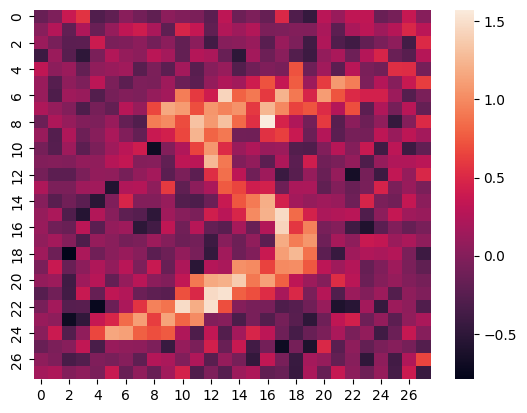

In [3]:
sigma = .25
X = mnist_data_train.values[0]
X += np.random.normal(0, sigma, X.shape)
sns.heatmap(X.reshape(28,28))

In [6]:
def run_perturbed_minst_test(selection_of_digits, sigma, num_permutations, num_samples):
    out = []
    for i, x_num in enumerate(selection_of_digits):
        for y_num in selection_of_digits[i:]:
            X = mnist_data_train.loc[x_num].sample(num_samples).values 
            Y = mnist_data_train.loc[y_num].sample(num_samples).values
            X += np.random.normal(0, sigma, X.shape)
            Y += np.random.normal(0, sigma, Y.shape)
            _mmdtest = 1 if MMD_two_sample_test(X,Y)(num_permutations) < 0.05 else 0
            _cketest = 1 if CKE_two_sample_test(X,Y, kappa_K = 1e4)(num_permutations) < 0.05 else 0
            out += [ ('CKE', x_num, y_num, _cketest),  ('MMD', x_num, y_num, _mmdtest)] 
            out += [ ('CKE', y_num, x_num, _cketest),  ('MMD', y_num, x_num, _mmdtest)] 
    return out

In [12]:
def run_perturbed_minst_test(x_num, y_num, sigma, num_permutations, num_samples):
    
    X = mnist_data_train.loc[x_num].sample(num_samples).values 
    Y = mnist_data_train.loc[y_num].sample(num_samples).values
    X += np.random.normal(0, sigma, X.shape)
    Y += np.random.normal(0, sigma, Y.shape)
    _mmdtest = 1 if MMD_two_sample_test(X,Y)(num_permutations) < 0.05 else 0
    _cketest = 1 if CKE_two_sample_test(X,Y, kappa_K = 1e4)(num_permutations) < 0.05 else 0
    out =  (('CKE', x_num, y_num, _cketest),  ('MMD', x_num, y_num, _mmdtest))
    return out

In [13]:
selection_of_digits = [3,8] 
NUM_CORES = 10

num_replications = 10
num_samples = 50
num_permutations = 100

sigma = .25

iter_args = [(x_num, y_num, sigma, num_permutations, num_samples) 
             for x_num in selection_of_digits for y_num in selection_of_digits for _ in range(num_replications)]
# iter_args = [(selection_of_digits, sigma, num_permutations, num_samples) for _ in range(num_replications)]
results = Parallel(n_jobs=NUM_CORES)(delayed(run_perturbed_minst_test)(*args) for args in tqdm(iter_args))
# results = [item for sublist in results for item in sublist]


KeyboardInterrupt: 

In [19]:
summary = {'CKE' : defaultdict(list), 'MMD' : defaultdict(list)}
for line in results:
    summary[line[0]][line[1], line[2]].append(line[3])


KeyError: 'C'

In [21]:
line

'CKE'

Text(0.5, 1.0, 'CKE')

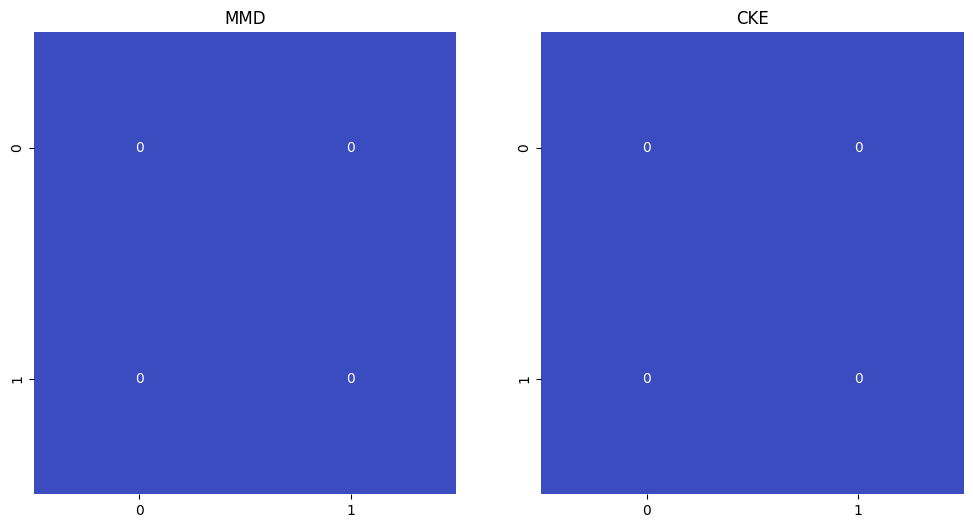

In [ ]:
S = len(selection_of_digits) 
MMD_matrix = np.zeros((S,S)); CKE_matrix = np.zeros((S,S))
for i, x_num in enumerate(selection_of_digits):
    for j, y_num in enumerate(selection_of_digits):
        CKE_matrix[i, j] = sum(summary['CKE'][(x_num, y_num)]) / num_replications;   CKE_matrix[j, i] = CKE_matrix[i, j]
        MMD_matrix[i, j] = sum(summary['MMD'][(x_num, y_num)]) / num_replications;   MMD_matrix[j, i] = MMD_matrix[i, j]  


fig, [axMMD, axCKE] = plt.subplots(1, 2, figsize=(12, 6))
vmin = 0; vmax = 1
sns.heatmap(MMD_matrix, annot=True, ax=axMMD, cmap='coolwarm', cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(CKE_matrix, annot=True, ax=axCKE, cmap='coolwarm', cbar=False, vmin=vmin, vmax=vmax)
axMMD.set_title('MMD')
axCKE.set_title('CKE')

In [6]:
selection_of_digits = [1,3,8] 

num_replications = 100
num_samples = 50
num_permutations = 500

sigma = .5




from collections import defaultdict
mmd_tests = defaultdict(list); cke_tests = defaultdict(list)
for rep in tqdm( range(num_replications)):
    for i, x_num in enumerate(selection_of_digits):
        for y_num in selection_of_digits[i:]:
                X = mnist_data_train.loc[x_num].sample(num_samples).values 
                Y = mnist_data_train.loc[y_num].sample(num_samples).values
                X += np.random.normal(0, sigma, X.shape)
                Y += np.random.normal(0, sigma, Y.shape)

                MMD_p_value = MMD_two_sample_test(X,Y)(num_permutations)
                mmd_tests[(x_num, y_num)].append(1 if MMD_p_value < 0.05 else 0)
                mmd_tests[(y_num , x_num)].append(1 if MMD_p_value < 0.05 else 0)

                CKE_p_value = CKE_two_sample_test(X,Y, kappa_K = 1e4)(num_permutations)
                cke_tests[(x_num, y_num)].append(1 if CKE_p_value < 0.05 else 0)
                cke_tests[(y_num , x_num)].append(1 if CKE_p_value < 0.05 else 0)



100%|██████████| 10/10 [02:37<00:00, 15.74s/it]


Text(0.5, 1.0, 'CKE')

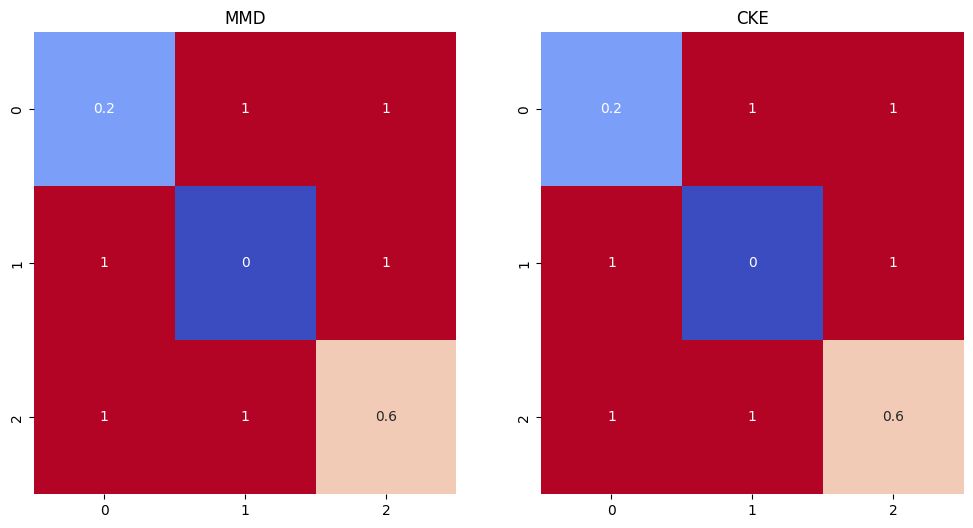

In [7]:
S = len(selection_of_digits) 
MMD_matrix = np.zeros((S,S)); CKE_matrix = np.zeros((S,S))
for i, x_num in enumerate(selection_of_digits):
    for j, y_num in enumerate(selection_of_digits):
        CKE_matrix[i, j] = sum(cke_tests[(x_num, y_num)]) / num_replications;   
        MMD_matrix[i, j] = sum(mmd_tests[(x_num, y_num)]) / num_replications;  


fig, [axMMD, axCKE] = plt.subplots(1, 2, figsize=(12, 6))
vmin = 0; vmax = 1
sns.heatmap(MMD_matrix, annot=True, ax=axMMD, cmap='coolwarm', cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(CKE_matrix, annot=True, ax=axCKE, cmap='coolwarm', cbar=False, vmin=vmin, vmax=vmax)
axMMD.set_title('MMD')
axCKE.set_title('CKE')

In [9]:
MMD_matrix

array([[0.2, 1. , 1. ],
       [1. , 0. , 1. ],
       [1. , 1. , 0.6]])

In [10]:
CKE_matrix

array([[0.2, 1. , 1. ],
       [1. , 0. , 1. ],
       [1. , 1. , 0.6]])

----

In [50]:
num_replications = 10
num_samples = 50
num_permutations = 1000

from collections import defaultdict
mmd_tests = defaultdict(list); cke_tests = defaultdict(list)
for x_num in tqdm(range(5), position=0):
    for y_num in tqdm(range(x_num, 5), position=1, leave=False):
        for rep in range(num_replications):
            X = mnist_data_train.loc[x_num].sample(num_samples).values
            Y = mnist_data_train.loc[y_num].sample(num_samples).values

            MMD_p_value = MMD_two_sample_test(X,Y)(num_permutations)
            mmd_tests[(x_num, y_num)].append(1 if MMD_p_value < 0.05 else 0)
            mmd_tests[(y_num , x_num)].append(1 if MMD_p_value < 0.05 else 0)

            CKE_p_value = CKE_two_sample_test(X,Y)(num_permutations)
            cke_tests[(x_num, y_num)].append(1 if CKE_p_value < 0.05 else 0)
            cke_tests[(y_num , x_num)].append(1 if CKE_p_value < 0.05 else 0)



MMD_matrix = np.zeros((10, 10)); CKE_matrix = np.zeros((10, 10))
for i, x_num in enumerate(range(10)):
    for j, y_num in enumerate(range(10)):
        CKE_matrix[i, j] = sum(cke_tests[(x_num, y_num)]) / num_replications;   
        MMD_matrix[i, j] = sum(mmd_tests[(x_num, y_num)]) / num_replications;  



fig, [axMMD, axCKE] = plt.subplots(1, 2, figsize=(12, 6))
vmin = 0; vmax = 1
sns.heatmap(MMD_matrix, annot=True, ax=axMMD, cmap='coolwarm', cbar=False, vmin=vmin, vmax=vmax)
sns.heatmap(CKE_matrix, annot=True, ax=axCKE, cmap='coolwarm', cbar=False, vmin=vmin, vmax=vmax)
axMMD.set_title('MMD')
axCKE.set_title('CKE')

 40%|████      | 2/5 [07:34<11:21, 227.16s/it]


KeyboardInterrupt: 

----

100%|██████████| 20/20 [04:34<00:00, 13.72s/it]


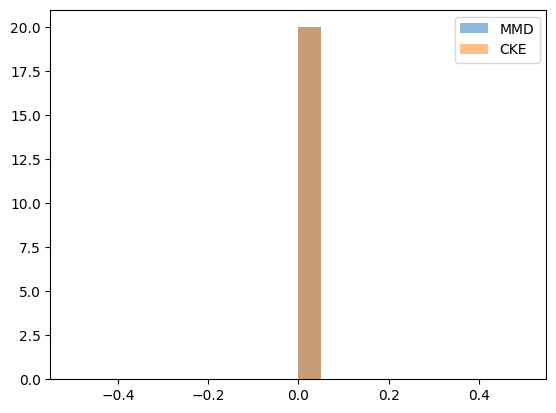

1.0
1.0


In [52]:
num_permutations = 1009
n_samples = 50
mmd_pvals = []; cke_pvals = []
x_num = 4; y_num = 1
# x_num = 9; y_num = 5

nexp = 20
for _ in tqdm(range(nexp)):
    X = mnist_data_train.loc[x_num].sample(n_samples).values
    Y = mnist_data_train.loc[y_num].sample(n_samples).values
    
    mmd_pvals.append(MMD_two_sample_test(X,Y)(num_permutations))
    cke_pvals.append(CKE_two_sample_test(X,Y, kappa_K = 1000)(num_permutations))

plt.hist(mmd_pvals, bins = 20, alpha = 0.5, label = 'MMD')
plt.hist(cke_pvals, bins = 20, alpha = 0.5, label = 'CKE')
plt.legend()
plt.show()

print(sum([_<.05 for _ in mmd_pvals]) / len(mmd_pvals))
print(sum([_<.05 for _ in cke_pvals]) / len(cke_pvals))


In [36]:
MMD_two_sample_test(X,Y)(num_permutations)

0.0

In [44]:
mnist_data_train.values.max()

np.int64(255)

In [45]:
mnist_data_train.values.min()


np.int64(0)